# MI2 - ES06: ICA2, Noise and Kurtosis
## The chantastic 4: Elisabeth Kress, Paola Suárez, Jianmeng Wu and Esra Zihni

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import loadmat
from scipy.stats import kurtosis

## 1. Natural Gradient

### a) ICA-learning scheme based on natural gradient

In [2]:
# Helper function for the transformed data
def logistic(y):
    return 1/(1+np.exp(-y))

# Helper fucntion for invertible matrix
def invert(N=3):
    #matrix = np.random.normal(loc=mu, scale=sigma, size=(N, N)) #scipy.stats.ortho_group.rvs
    matrix = np.random.uniform(0, 1, (N, N))
    exception = True
    while exception:
        try:
            np.linalg.inv(matrix)
        except:
            matrix = np.random.uniform(0, 1, (N, N))
        else:
            exception = False
    return matrix

In [3]:
def nat_meng(data, w0, eps=0.5, lamb=0.9):
    """
    Computes natural gradient ascent on an array of mixed sounds in order to obtain the best weight matrix.
    data: an array containing mixed sources.
    w0: initial weight matrix, randomly generated.
    returns
    ws: an array of all the evolution of weights.
    """
    ws = np.zeros((source1.shape[0]+1, 3, 3))
    ws[0] = w0
    for t in np.arange(source1.shape[0]):
        x = data[:, t]
        W = ws[t].copy()
        eps = eps * lamb
        #eps = eps0/(t+1)
        delta = np.identity(3)
        u = np.dot(W, x)
        update = np.dot(delta, W) + np.dot((1- 2*logistic(u)).reshape(3,1), np.dot(u.reshape(1,3), W))
        delta_W = eps * update
        W += delta_W
        ws[t+1] = W
    return ws

### b) ICA on sounds and noise

In [4]:
# Load sounds
source1 = np.loadtxt('sounds/sound1.dat')
source2 = np.loadtxt('sounds/sound2.dat')
original = np.array([source1, source2])

In [5]:
# Create Gaussian noise using mu and sigma from the first two sources 
mu = np.mean(original.mean(axis=1))
sigma = np.mean(original.std(axis=1))
noise_g = np.random.normal(loc=mu, scale=sigma, size=source1.shape)

In [8]:
# Add all sources
original = np.array([source1, source2, noise_g])

In [124]:
# Create an invertible mixing matrix
A = invert()

In [125]:
# Mix the sources
mixed = np.dot(A, original)

In [126]:
# Center the data
mixed_c = np.subtract(mixed.T, mixed.mean(axis=1)).T

In [127]:
# Initialize weights
W0 = invert()

In [128]:
# Run natural gradient
Ws = nat_meng(mixed_c, W0)

In [129]:
# Unmixed
W = Ws[-1]
unmixed = np.dot(W, mixed_c)

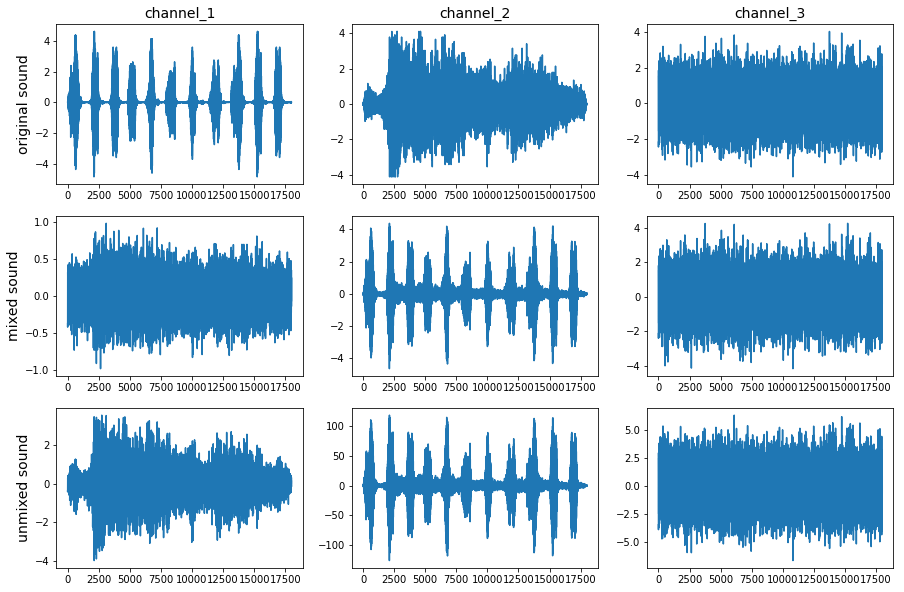

In [130]:
# Plot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sounds = [original, mixed, unmixed]
labels1 = ['channel_1', 'channel_2', 'channel_3']
labels2 = ["original", "mixed", "unmixed"]
for i in range(3):
    for j in [0, 1, 2]:
        axes[0,j].set_title("%s" %labels1[j], size=14)
        axes[i,j].plot(sounds[i][j])
        axes[i,0].set_ylabel("%s sound" %labels2[i], size=14)
plt.show()

In [131]:
Audio(unmixed[2], rate=8192)

### c) Repeat with a different noise source

In [168]:
noise_l = np.random.laplace(loc=mu, scale=sigma, size=source1.shape)

In [169]:
# Add all sources
original_l = np.array([source1, source2, noise_l])

In [170]:
# Mix the sources
mixed_l = np.dot(A, original_l)

In [171]:
# Center the data
mixed_cl = np.subtract(mixed_l.T, mixed_l.mean(axis=1)).T

In [172]:
# Run natural gradient
Ws_l = nat_meng(mixed_cl, W0)

In [173]:
# Unmixed
W_l = Ws_l[-1]
unmixed_l = np.dot(W_l, mixed_cl)

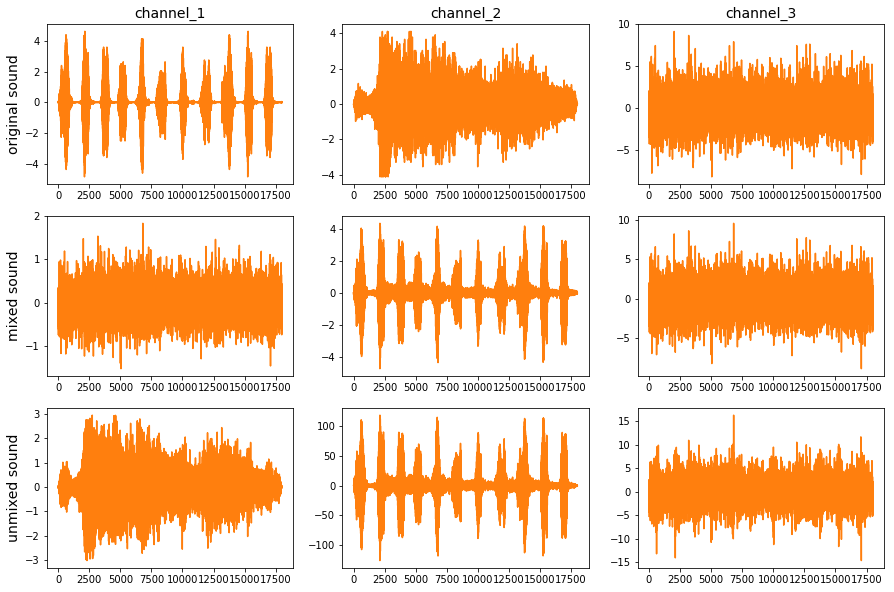

In [174]:
# Plot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sounds = [original_l, mixed_l, unmixed_l]
labels1 = ['channel_1', 'channel_2', 'channel_3']
labels2 = ["original", "mixed", "unmixed"]
for i in range(3):
    for j in [0, 1, 2]:
        axes[0,j].set_title("%s" %labels1[j], size=14)
        axes[i,j].plot(sounds[i][j], c="C1")
        axes[i,0].set_ylabel("%s sound" %labels2[i], size=14)
plt.show()

In [175]:
Audio(unmixed_l[2], rate=8192)

## 2. Moments of univariate distributions

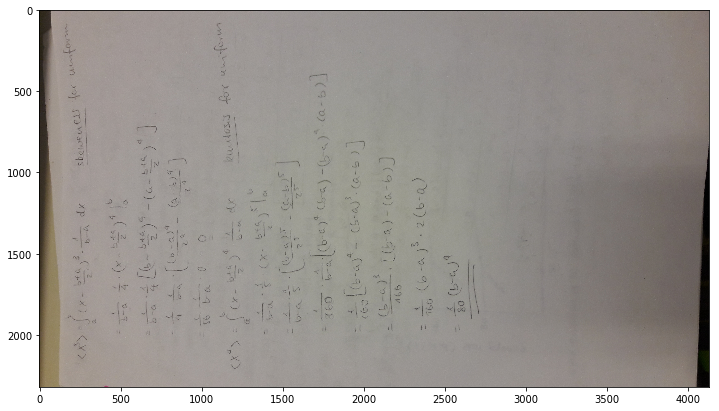

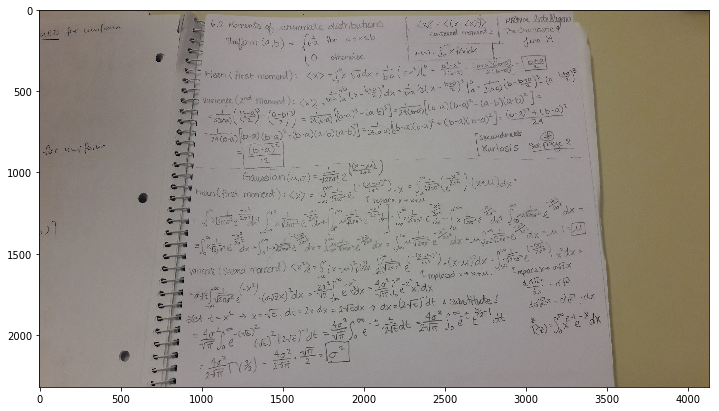

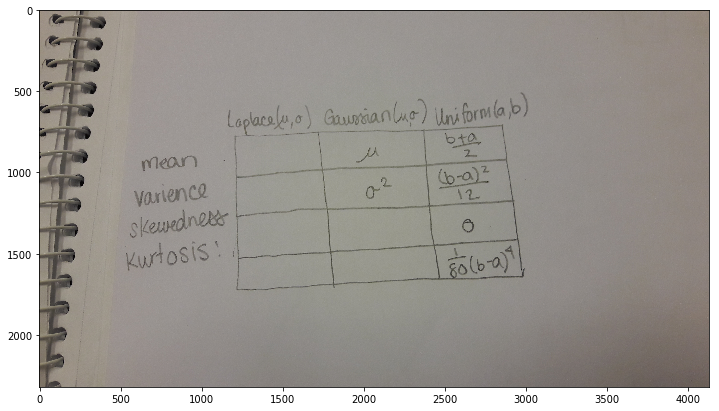

In [176]:
plt.figure(figsize=(12,20))
f = plt.imread('1.jpg' , format='jpg')
plt.imshow(f)
plt.show()

plt.figure(figsize=(12,20))
f = plt.imread('2.jpg' , format='jpg')
plt.imshow(f)
plt.show()

plt.figure(figsize=(12,20))
f = plt.imread('3.jpg' , format='jpg')
plt.imshow(f)
plt.show()

## 3. Kurtosis of toy data

In [177]:
# Load data
data = loadmat("distrib.mat")
uni = data["uniform"]
nor = data["normal"]
lap = data["laplacian"]

In [178]:
s = np.array([uni, nor, lap])

### a) Apply mixing matrix

In [179]:
A = np.array([[4, 3], [2, 1]])

mix_s = np.array([np.dot(A, s[i]) for i in range(3)])

### b) Center the data

In [180]:
mix_c = np.array([(np.subtract(mix_s[i].T, mix_s.mean(axis=2)[i])).T for i in range(3)])

### c) Decorrelate the data

In [181]:
# PCA
covs = np.array([np.cov(mix_c[i]) for i in range(3)])
ls = np.array([np.linalg.eig(covs[i])[0] for i in range(3)])
es = np.array([np.linalg.eig(covs[i])[1] for i in range(3)])

In [182]:
# Projection
sol = np.array([np.dot(es[i].T, mix_c[i]) for i in range(3)])

### d) Scale the data

In [183]:
# Whiten
mix_w = np.array([np.dot(np.diag(ls[i]**(-1/2)), sol[i]) for i in range(3)])

### e) Rotate and calculate kurtosis

In [184]:
angles = np.linspace(0, 2*np.pi, 101) #np.pi/50)
#angles = np.pi

R = np.array([[np.cos(angles), np.sin(angles)], [-np.sin(angles), np.cos(angles)]]).T

In [185]:
# Rotation
sol_R = np.array([np.array([np.dot(R[j], mix_w[i]) for j in range(101)]) for i in range(3)])

In [186]:
# Kurtosis, k_uni < 0; k_nor ~ 0; k_lap >0
kurts = kurtosis(sol_R, axis=3)

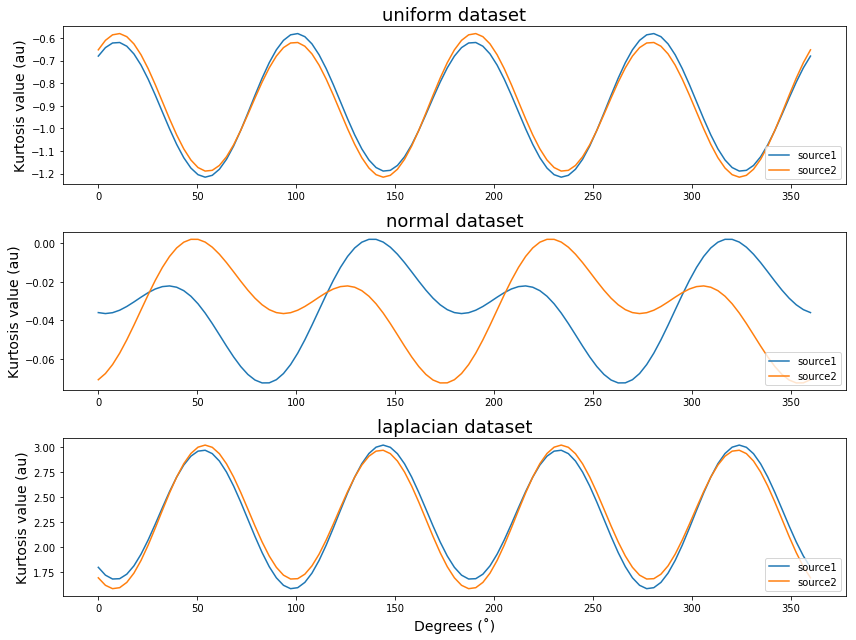

In [187]:
f, axes = plt.subplots(3, 1, figsize=(12,9))
labels = ["uniform", "normal", "laplacian"]
for i in range(3):
    axes[i].plot(np.rad2deg(angles), kurts[i,:,:])
    axes[i].set_title("%s dataset" %labels[i], size=18)
    axes[2].set_xlabel("Degrees (˚)", size=14)
    axes[i].set_ylabel("Kurtosis value (au)", size=14)
    axes[i].legend(["source1", "source2"], loc='lower right')
plt.tight_layout()
plt.show()

#### Discuss what the extrama of kurtosis mean

### f) Min and max kurtosis

In [188]:
# Extrema of the kurtosis correspond to independent sources if model assumptions are correct
min_k = kurts[:,:,0].argmin(axis=1)
max_k = kurts[:,:,0].argmax(axis=1)

In [189]:
# Reduced the dimensions of sol_R to be coherent and the region of interest
sol_min = np.array([sol_R[i,min_k[i],:,:] for i in range(3)])
sol_max = np.array([sol_R[i,max_k[i],:,:] for i in range(3)])

### Plots

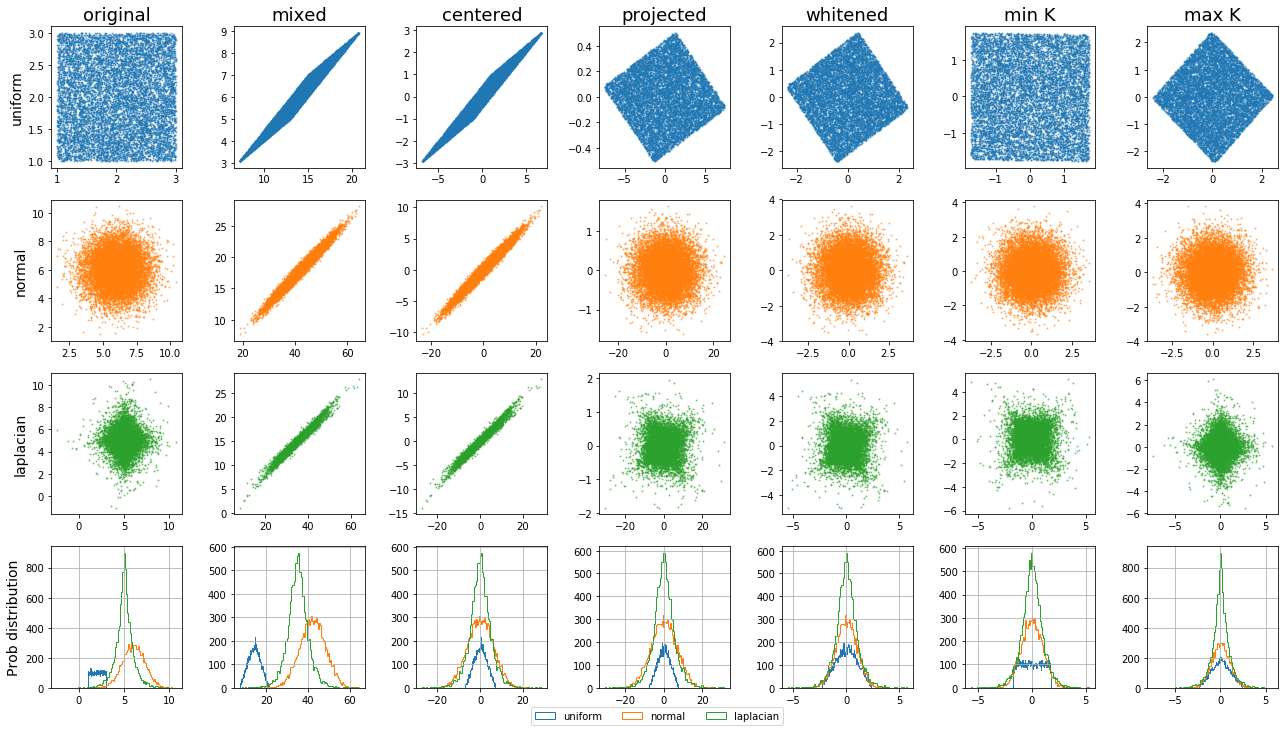

In [190]:
# A lot of plots
f, axes = plt.subplots(4, 7, figsize=(18, 10))
to_plot = [s, mix_s, mix_c, sol, mix_w, sol_min, sol_max]
titles = ["original", "mixed", "centered", "projected", "whitened", "min K", "max K"]
labels = ["uniform", "normal", "laplacian"]
colors = ["C0", "C1", "C2"]
for i in range(3):
    for j, d in enumerate(to_plot):
        axes[i,j].scatter(d[i,0,:], d[i,1,:], s=1, c=colors[i], alpha=0.5)
        axes[0,j].set_title("%s" %titles[j], size=18)
        axes[i,0].set_ylabel("%s" %labels[i], size=14)

        axes[3,j].hist(d[i,0,:], bins=100, histtype='step', label=labels[i])
        axes[3,j].grid()
axes[3,0].set_ylabel("Prob distribution", size=14)   
plt.suptitle('')
plt.legend(ncol=3, bbox_to_anchor=(-2.75,-0.1))
plt.tight_layout()
plt.show()

#### Compare the histograms after rotation by $\theta_{min}$ and $\theta_{max}$ for the different distributions

** uniform **: rotation by $\theta_{min}$ results in good marginal histogram as compared to the original data, whereas rotation by  $\theta_{max}$ leads to rather poor recovery of the original data. This is due to the nature of the uniform distribution that has low kurtosis value, i.e. it has only few outliers (or is flat).

** normal **: both $\theta_{min}$ and $\theta_{max}$ are suitable for reproducing the marginal distribution, although the latter retains the amplitude of the orginal data, better. 

** laplacian **: rotation by $\theta_{max}$ results in better marginal distribution, as the laplacian distribution has high kurtosis, i.e. many outliers (or is peaked).